<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Data Analyst Course Final Project - Student Project**
    
**E-Commerce Product Range Analysis**

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Step 1 - Task Decomposition**
    
First, we will need to examine our products: 
    
    
* Find out the best/worst selling products, based on quantity and price.
    
* Go over the invoices and check if there is there an increase in sales during specific weeks/months.
    
* One way to increase sales is to offer product bundles or promotions/discounts. Is there any indication that we provide this?
    
* Does the appeareance of a low selling item in a bundle dissuade potential customers from buying them?
    
* Is there a special pricing contract for those that buy in bulk (i.e, businesses)?
    

Once we answer these questions, we would be able to build a typical purchase portfolio, and find out which factors determine purchases, and purchase sizes.

In [1]:
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
import numpy as np
import math as mth
from plotly import graph_objects as go
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We need to convert the InvoiceDate column to a timestamp. After that, our data is set and we can check for duplicates and missing values.

In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [5]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the description column, let's check if the missing description is simply an error (meaning, the item exists and has a  StockCode, but has no description). For that, we will have to create a dataframe with the missing values, and use a for loop to iterate over the unique code values, and fill them accordingly. 
    
We will run this same code to try and fill missing customerID numbers based on the invoice number.

In [6]:
missing_values = data['Description'].isnull()
missing_rows = data[missing_values]
stock_codes = missing_rows['StockCode'].unique()

for stock_code in stock_codes:
    non_null_descriptions = data.loc[data['StockCode'] == stock_code, 'Description'].dropna()
    
    if len(non_null_descriptions) > 0:
        description = non_null_descriptions.iloc[0]
        
        data.loc[(data['StockCode'] == stock_code) & missing_values, 'Description'] = description

In [7]:
missing_values_customer_id = data['CustomerID'].isnull()
missing_rows_customer_id = data[missing_values_customer_id]
invoice_numbers = missing_rows_customer_id['InvoiceNo'].unique()

for invoice_number in invoice_numbers:
    non_null_customer_ids = data.loc[data['InvoiceNo'] == invoice_number, 'CustomerID'].dropna()
    
    if len(non_null_customer_ids) > 0:
        customer_id = non_null_customer_ids.iloc[0]
        
        data.loc[(data['InvoiceNo'] == invoice_number) & missing_values_customer_id, 'CustomerID'] = customer_id

In [8]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
For the description column, we were able to fill in 1342 missing item descriptions. Let's take a closer look at these 112 rows, and see if there is a pattern or reason to them.
    
On the other hand, we did not get the results we wanted for filling in the missing CustomerID values. Let's see if there is a pattern or reason to it.

In [9]:
print(missing_rows)
missing_rows['UnitPrice'].value_counts()

       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2018-11-29 11:52:00   
1970      536545     21134         NaN         1 2018-11-29 14:32:00   
1971      536546     22145         NaN         1 2018-11-29 14:33:00   
1972      536547     37509         NaN         1 2018-11-29 14:33:00   
1987      536549    85226A         NaN         1 2018-11-29 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2019-12-05 18:26:00   
535326    581203     23406         NaN        15 2019-12-05 18:31:00   
535332    581209     21620         NaN         6 2019-12-05 18:35:00   
536981    581234     72817         NaN        27 2019-12-06 10:33:00   
538554    581408     85175         NaN        20 2019-12-06 14:06:00   

        UnitPrice  CustomerID  
622           0.0         NaN  
1970          0.0         NaN  
1971          0.0         NaN  
1972   

0.0    1454
Name: UnitPrice, dtype: int64

In [10]:
missing_rows_customer_id

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2018-11-29 11:52:00,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,NaN


In [11]:
missing_rows_customer_id['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C553354       1
546129        1
569381        1
563190        1
561282        1
Name: InvoiceNo, Length: 3710, dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
* We see that the price for each item with no description is 0.0. Is this the result of a promotional offer (BOGO), voucher or gift card redemption, or an initiated discount due to improper service/delivery/faulty product?
    
Since we have no real way to answer it, we will just leave them as they are, but we reserve the option to remove these rows if necessary.
    
 
    
* As for the missing customer ID, we see that we have 3710 such customers, some with more than 700 purchases (assuming each invoice ID is generated for each purchase). Maybe these are businesses (anot not private customers) making these purchases, so they have a business account and don't need a customer ID (as part of a contract). It could also be a store feature, allowing people to make purchase without signing up.
    
As it stands, we cannot remove these missing values.

In [12]:
data.duplicated().sum()

5268

In [13]:
duplicates = data[data.duplicated()]
duplicates

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0
...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2019-12-07 11:34:00,0.39,14446.0
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2019-12-07 11:34:00,2.49,14446.0
541692,581538,22992,REVOLVER WOODEN RULER,1,2019-12-07 11:34:00,1.95,14446.0
541699,581538,22694,WICKER STAR,1,2019-12-07 11:34:00,2.10,14446.0


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
As far as duplicates are concerned, we can assume that they are indeed erroneous. If there were indeed multiple purchases of the same item on the same date with the same invoice, then we would expect the quantity to be 2 or more. Since this is not the case, we will drop the duplicate rows.

In [14]:
new_data = data.drop_duplicates()
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536529 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.8+ MB


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**EDA Conclusions**
    
* All remaining items with no description have a price of 0.0. We gave possible reasons as to why it could be above.
    
* We need to get a better understanding of who our clients are, and whether we offer contracts or special deals for B2B transactions.
    
* We removed duplicated rows.
    
Now we can proceed towards our self-assigned tasks.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Let's begin by finding out which were the best/worst selling products, based on quantity and price.

In [ ]:
new_data

In [ ]:
new_data['Revenue'] = new_data['Quantity'] * new_data['UnitPrice']
new_data

In [ ]:
quantity_sold = new_data.groupby(['StockCode', 'Description'])['Quantity'].sum()
quantity_sold.sort_values(ascending=False)

In [ ]:
total_revenue = new_data.groupby(['StockCode', 'Description']).apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
total_revenue.sort_values(ascending=False)

In [ ]:
sorted_revenue = total_revenue.sort_values(ascending=False)
middle_values = sorted_revenue.iloc[5:-5]
middle_values

In [ ]:
new_data['invoice_date_only'] = new_data['InvoiceDate'].dt.date
new_data['invoice_date_only'].value_counts()

In [21]:
new_data['invoice_date_only'] = pd.to_datetime(new_data['invoice_date_only'])

/tmp/ipykernel_59/2641455332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['invoice_date_only'] = pd.to_datetime(new_data['invoice_date_only'])


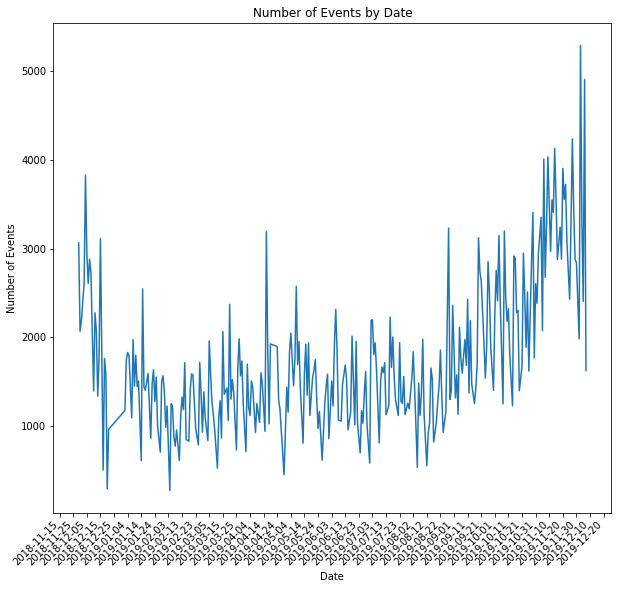

In [22]:
event_counts = new_data['invoice_date_only'].value_counts().sort_index()
event_counts.plot(kind='line', figsize=(10,10))

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=50))
plt.ylabel('Number of Events')
plt.title('Number of Events by Date')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
From the graph above, we see that the time period with the most sales was the first week of December 2019.

In [23]:
new_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,invoice_date_only
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.30,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0,20.34,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0,22.00,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0,20.34,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0,20.34,2018-11-29
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680.0,10.20,2019-12-07
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680.0,12.60,2019-12-07
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680.0,16.60,2019-12-07
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680.0,16.60,2019-12-07


In [24]:
less_or_zero = new_data[new_data['UnitPrice'] <= 0]
less_or_zero['Description'].value_counts()

check                                  159
?                                       49
damages                                 45
damaged                                 43
found                                   25
                                      ... 
ORIGAMI VANILLA INCENSE CONES            1
MINI HIGHLIGHTER PENS                    1
Amazon Adjustment                        1
BLUE MONTE CARLO HANDBAG                 1
allocate stock for dotcom orders ta      1
Name: Description, Length: 1182, dtype: int64

In [25]:
less_or_zero_values = less_or_zero['Description'].value_counts()
pd.set_option('display.max_rows', None)
less_or_zero_values

check                                  159
?                                       49
damages                                 45
damaged                                 43
found                                   25
sold as set on dotcom                   20
adjustment                              16
Damaged                                 14
thrown away                             10
FOLKART HEART NAPKIN RINGS              10
RABBIT NIGHT LIGHT                      10
Unsaleable, destroyed.                   9
PAPER CHAIN KIT EMPIRE                   9
FRENCH BLUE METAL DOOR SIGN 1            9
amazon                                   8
MINT KITCHEN SCALES                      8
Found                                    8
OWL DOORSTOP                             8
FRENCH BLUE METAL DOOR SIGN 8            8
FRENCH BLUE METAL DOOR SIGN 3            7
FRENCH BLUE METAL DOOR SIGN 4            7
FRENCH BLUE METAL DOOR SIGN No           7
Amazon                                   7
RECIPE BOX 

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We have no indication of bundles being offered. There might be promotions or discounts (as evident by the appearence of items in our less_or_zero data), but we cannot determine if they were discounted becuase of said promotion/discount or whether they were discounted becuase of being damaged/faulty/etc.

In [26]:
pd.options.display.float_format = '{:.2f}'.format

revenue_by_customer = new_data.groupby('CustomerID').agg({'Revenue' : 'sum'})
revenue_by_customer.sort_values(by = 'Revenue', ascending=False)

,Revenue
CustomerID,
14646.00,279489.02
18102.00,256438.49
17450.00,187322.17
14911.00,132458.73
12415.00,123725.45
14156.00,113214.59
17511.00,88125.38
16684.00,65892.08
13694.00,62690.54


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Statistical Testing**
    
We would want to test the relationship between price and sales.
    
The null hypothesis suggests that there is no correlation between product price and sales.
    
The alternative hypothesis suggests that there is a correlation between product price and sales.

In [27]:
correlation, p_value = stats.pearsonr(new_data['UnitPrice'], new_data['Quantity'])

In [ ]:
if p_value < 0.05:
    print("We can reject the null hypothesis. There is a significant relationship between product price and sales.")
else:
    print("We fail to reject the null hypothesis. There is no significant relationship between product price and sales.")

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By using the Pearson Correlation Test to check the relationship between product price and sales, we see that we fail to reject the null hypothesis, meaning there is no significant relationship between them.

There could be several reasons to it:
    
* The data is skewed by the negative values (our accounting corrections - depreciation, sales, costs, etc.).
    
* There actually isn't a correlation - consumer behavior is difficult to predict.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Conclusions**
    
As we stated during the task decomposition stage, and from the results we got during this project, we can answer our questioms:
    
* The best selling product was "WORLD WAR 2 GLIDERS ASSTD DESIGNS", selling 53751 units. The worst selling item, quantity-wise, was a depreciation item "printing smudges/thrown away".
    
From a revenue perspective, the products that generated the most and least revenue were "DOTCOM POSTAGE" (which is a fee rather than an actual product, and it generated 206245.480. The actual product that generated the most revenue was "REGENCY CAKESTAND 3 TIER" with revenue of 164459.490) and "WHITE CHERRY LIGHTS", the first actual product (and not service or accounting measure in our data), that generated -54.00, respectively.
    
* From the graph "Number of Events by Days" above, we see that the time period with the most sales was the first week of December 2019.
    
* We found no indication of offered bundles, but did find evidence of discounts and manual price adjustments (each valued at -5696.22 and  -69034.190, respectively). While we don't know exactly how and when they were applied, we do know that these events took place and had an impact.
    
* Likewise, we can only assume that there are special contracts for B2B sales, but they are not clearly evident.  
    
* From the statistical testing, we found no correlation between product price and sales.
    
    
As far as the product range analysis goes, we can refer to the presentation in the following link: https://drive.google.com/file/d/11KWMzQMz3tridGFdGzH58KPLX1onq2zu/view?usp=drive_link
    
    
Link to dashboard: https://public.tableau.com/views/OmriGill-FinalProjectDashboardOption2/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link